# Bagging 

Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. 

### Bagging: Bootstrap Aggregation. 

Consists in sample with replacement (bootstrap) the training set and fit the same model of the different samples. In the case of classifications problems, Baggin aggregates predictions by majority voting while in regression problems, the final prediction in the average. 


In [2]:
import pandas as pd

data = pd.read_csv('../data/indian_liver_patient_preprocessed.csv')
data.head(2)

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1


In [3]:
from sklearn.model_selection import train_test_split

# separate the target variable and the features 
data_X = data.iloc[:, 0:11]
data_y = data.iloc[:, 11].astype('category')

# Split dataset into 80% train, 20% test, stratify according to the target variables 
X_train, X_test, y_train, y_test = train_test_split(data_X
                                                   , data_y
                                                   , test_size = 0.2
                                                   , stratify = data_y 
                                                   , random_state = 123)

### Define the bagging classifier

In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [4]:
# Import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt
# dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=1)
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
# bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

## Evaluate Bagging performance

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

In [5]:
from sklearn.metrics import accuracy_score

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.65


## Out Of BagEvaluation

### Prepare the ground

In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter `oob_score` to `True` during instantiation. 

After training the classifier, the OOB accuracy can be obtained by accessing the `.oob_score_` attribute from the corresponding instance.

Compare the OOB accuracy to the test set accuracy of a bagging classifier 

In [6]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

train bc and compare its test set accuracy to its OOB accuracy.

In [7]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.707, OOB accuracy: 0.698


## Tuning a CART's Hyperparameters

In [8]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

### Set the tree's hyperparameter grid

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree `dt` and find the optimal classifier in the next exercise.

In [9]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

#Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4,5, 6],
             'min_samples_leaf': [0.04, 0.06, 0.08],
             'max_features': [0.2, 0.4,0.6, 0.8]            
            }

### Search for the optimal tree
In this exercise, you'll perform grid search using 10-fold cross validation to find dt's optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the `GridSearchCV` object without fitting it to the training set.

In [10]:
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,                        
                       param_grid=params_dt,                       
                       scoring='accuracy',                                              
                       cv=10,                       
                       n_jobs=-1)

In [11]:
# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=8,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
             

In [12]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 0.08}


In [13]:
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print(best_CV_score)

0.7429694727104532


In [14]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.707


## Train an RF classifier

In [15]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [17]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Alkaline_Phosphotase_std          0.131311
Alamine_Aminotransferase_std      0.124551
Age_std                           0.117826
Aspartate_Aminotransferase_std    0.108806
Unnamed: 0                        0.102794
Total_Bilirubin_std               0.096445
Total_Protiens_std                0.085315
Albumin_std                       0.078002
Albumin_and_Globulin_Ratio_std    0.070759
Direct_Bilirubin_std              0.069080
Is_male_std                       0.015112
dtype: float64

No handles with labels found to put in legend.


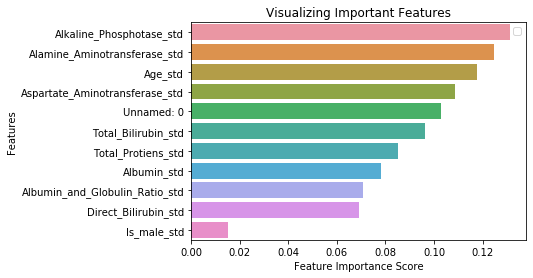

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

[References](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)